In [45]:
import villas.dataprocessing.readtools as rt
from villas.dataprocessing.timeseries import TimeSeries as ts
import matplotlib.pyplot as plt
import sys
sys.path.append("/home/mto/dpsim/build/")
import dpsimpy
%matplotlib widget

model_name = "EMT_Ph1_Dufour_L2_C_R_SW_RLC_Validation"

#Simulation parameters
dpsimpy.Logger.set_log_dir('logs/' + model_name)

time_step = 0.0001
final_time = 0.1
switch_close_time = 0.05

# Nodes
gnd = dpsimpy.emt.SimNode.gnd
n1 = dpsimpy.emt.SimNode('n1', dpsimpy.PhaseType.Single)
n2 = dpsimpy.emt.SimNode('n2', dpsimpy.PhaseType.Single)
n3 = dpsimpy.emt.SimNode('n3', dpsimpy.PhaseType.Single)
n4 = dpsimpy.emt.SimNode('n4', dpsimpy.PhaseType.Single)
n5 = dpsimpy.emt.SimNode('n5', dpsimpy.PhaseType.Single)
n6 = dpsimpy.emt.SimNode('n6', dpsimpy.PhaseType.Single)

# Components
vs = dpsimpy.emt.ph1.VoltageSource('vs')
vs.set_parameters(V_ref=complex(500000,0), f_src=60)

l1 = dpsimpy.emt.ph1.Inductor('l1')
l1.set_parameters(L = 0.09803)

l2 = dpsimpy.emt.ph1.Inductor('l2')
l2.set_parameters(L = 0.04886)

r1 = dpsimpy.emt.ph1.Resistor('r1')
r1.set_parameters(R = 26.07)


c1 = dpsimpy.emt.ph1.Capacitor('c1')
c1.set_parameters(C=0.000001)

sw = dpsimpy.emt.ph1.Switch('sw')
sw.set_parameters(1e9, 0.00001, False)
sw.open()

r_rlc = dpsimpy.emt.ph1.Resistor('r_rlc')
r_rlc.set_parameters(R=50)
l_rlc = dpsimpy.emt.ph1.Inductor('l_rlc')
l_rlc.set_parameters(L=0.01)
c_rlc = dpsimpy.emt.ph1.Capacitor('c_rlc')
c_rlc.set_parameters(C=0.000001)


# Assemble circuit
vs.connect([gnd, n1])
l1.connect([n2, n1])
l2.connect([n3, n2])
r1.connect([n3, n2])
c1.connect([gnd, n3])
sw.connect([n4, n3])
l_rlc.connect([n5, n4])
c_rlc.connect([n6, n5])
r_rlc.connect([gnd, n6])

system = dpsimpy.SystemTopology(60, [gnd, n1, n2, n3, n4, n5, n6], [vs, l1, l2, r1, c1, sw, r_rlc, l_rlc, c_rlc])

#Logging
logger = dpsimpy.Logger(model_name)
logger.log_attribute('v3', 'v', n3)
logger.log_attribute('i_rlc', 'i_intf', l_rlc)
logger.log_attribute('i_c1', 'i_intf', c1)

#Events
sw_event = dpsimpy.event.SwitchEvent(switch_close_time, sw, True)

#Simulation
sim = dpsimpy.Simulation(model_name, dpsimpy.LogLevel.debug)
sim.set_system(system)
sim.set_time_step(time_step)
sim.set_final_time(final_time)
sim.set_domain(dpsimpy.Domain.EMT)
sim.set_mna_solver_implementation(dpsimpy.MnaSolverImpl.EigenSparse)
sim.do_init_from_nodes_and_terminals(False)
sim.add_logger(logger)
sim.add_event(sw_event)
sim.run()


5.000000e-02: Handle event time


[23:45:59.265799 EMT_Ph1_Dufour_L2_C_R_SW_RLC_Validation info] Initialize simulation: EMT_Ph1_Dufour_L2_C_R_SW_RLC_Validation
[23:45:59.265979 MnaSolverFactory info] creating EigenSparse solver implementation
[23:45:59.267464 EMT_Ph1_Dufour_L2_C_R_SW_RLC_Validation info] Scheduling tasks.
[23:45:59.267904 EMT_Ph1_Dufour_L2_C_R_SW_RLC_Validation info] Scheduling done.
[23:45:59.267908 EMT_Ph1_Dufour_L2_C_R_SW_RLC_Validation info] Opening interfaces.
[23:45:59.267909 EMT_Ph1_Dufour_L2_C_R_SW_RLC_Validation info] Start synchronization with remotes on interfaces
[23:45:59.267911 EMT_Ph1_Dufour_L2_C_R_SW_RLC_Validation info] Synchronized simulation start with remotes
[23:45:59.267914 EMT_Ph1_Dufour_L2_C_R_SW_RLC_Validation info] Start simulation: EMT_Ph1_Dufour_L2_C_R_SW_RLC_Validation
[23:45:59.267918 EMT_Ph1_Dufour_L2_C_R_SW_RLC_Validation info] Time step: 1.000000e-04
[23:45:59.267920 EMT_Ph1_Dufour_L2_C_R_SW_RLC_Validation info] Final time: 1.000000e-01
[23:45:59.338033 EMT_Ph1_Dufour_L

In [46]:
model_name_SSN = "EMT_Ph1_SSN_Dufour_L2_C_R_SW_RLC_Validation";

#Simulation parameters
dpsimpy.Logger.set_log_dir('logs/' + model_name_SSN)

time_step = 0.0001
final_time = 0.1
switch_close_time = 0.05

# Nodes
gnd = dpsimpy.emt.SimNode.gnd
n1 = dpsimpy.emt.SimNode('n1', dpsimpy.PhaseType.Single)
n2 = dpsimpy.emt.SimNode('n2', dpsimpy.PhaseType.Single)
n3 = dpsimpy.emt.SimNode('n3', dpsimpy.PhaseType.Single)
n4 = dpsimpy.emt.SimNode('n4', dpsimpy.PhaseType.Single)

# Components
vs = dpsimpy.emt.ph1.VoltageSource('vs')
vs.set_parameters(V_ref=complex(500000,0), f_src=60)

l1 = dpsimpy.emt.ph1.Inductor('l1')
l1.set_parameters(L = 0.09803)

l2 = dpsimpy.emt.ph1.Inductor('l2')
l2.set_parameters(L = 0.04886)

r1 = dpsimpy.emt.ph1.Resistor('r1')
r1.set_parameters(R = 26.07)

c1 = dpsimpy.emt.ph1.Capacitor('c1')
c1.set_parameters(C=0.000001)

sw = dpsimpy.emt.ph1.Switch('sw')
sw.set_parameters(1e9, 0.001, False)
sw.open()

rlc = dpsimpy.emt.ph1.Full_Serial_RLC('rlc')
rlc.set_parameters(R=50, L=0.01, C=0.000001)

# Assemble circuit
vs.connect([gnd, n1])
l1.connect([n2, n1])
l2.connect([n3, n2])
r1.connect([n3, n2])
c1.connect([gnd, n3])
sw.connect([n4, n3])
rlc.connect([gnd, n4])

system = dpsimpy.SystemTopology(60, [gnd, n1, n2, n3, n4], [vs, l1, l2, r1, c1, sw, rlc])

#Logging
loggerSSN = dpsimpy.Logger(model_name_SSN)
loggerSSN.log_attribute('v3', 'v', n3)
loggerSSN.log_attribute('i_rlc', 'i_intf', rlc)
loggerSSN.log_attribute('i_c1', 'i_intf', c1)

#Events
sw_event = dpsimpy.event.SwitchEvent(switch_close_time, sw, True)

#Simulation
sim = dpsimpy.Simulation(model_name_SSN, dpsimpy.LogLevel.debug)
sim.set_system(system)
sim.set_time_step(time_step)
sim.set_final_time(final_time)
sim.set_domain(dpsimpy.Domain.EMT)
sim.set_mna_solver_implementation(dpsimpy.MnaSolverImpl.EigenSparse)
sim.do_init_from_nodes_and_terminals(False)
sim.add_logger(loggerSSN)
sim.add_event(sw_event)
sim.run()


5.000000e-02: Handle event time


[23:46:02.687518 EMT_Ph1_SSN_Dufour_L2_C_R_SW_RLC_Validation info] Initialize simulation: EMT_Ph1_SSN_Dufour_L2_C_R_SW_RLC_Validation
[23:46:02.687690 MnaSolverFactory info] creating EigenSparse solver implementation
[23:46:02.688908 EMT_Ph1_SSN_Dufour_L2_C_R_SW_RLC_Validation info] Scheduling tasks.
[23:46:02.689319 EMT_Ph1_SSN_Dufour_L2_C_R_SW_RLC_Validation info] Scheduling done.
[23:46:02.689323 EMT_Ph1_SSN_Dufour_L2_C_R_SW_RLC_Validation info] Opening interfaces.
[23:46:02.689324 EMT_Ph1_SSN_Dufour_L2_C_R_SW_RLC_Validation info] Start synchronization with remotes on interfaces
[23:46:02.689326 EMT_Ph1_SSN_Dufour_L2_C_R_SW_RLC_Validation info] Synchronized simulation start with remotes
[23:46:02.689329 EMT_Ph1_SSN_Dufour_L2_C_R_SW_RLC_Validation info] Start simulation: EMT_Ph1_SSN_Dufour_L2_C_R_SW_RLC_Validation
[23:46:02.689332 EMT_Ph1_SSN_Dufour_L2_C_R_SW_RLC_Validation info] Time step: 1.000000e-04
[23:46:02.689334 EMT_Ph1_SSN_Dufour_L2_C_R_SW_RLC_Validation info] Final time: 1.

In [47]:
#Read Results
ts_rc = rt.read_timeseries_dpsim('logs/' + model_name + '/' + model_name + '.csv')
ts_ssn = rt.read_timeseries_dpsim('logs/' + model_name_SSN + '/' + model_name_SSN + '.csv')

#RMSE between Resistive Companion and SSN node 3 voltage
err_RC_SSN_V3 = ts.rmse(ts_rc['v3'], ts_ssn['v3'])
print("RMSE between RC and SSN [Node 3 Voltage]: %g" % (err_RC_SSN_V3))

#RMSE between Resistive Companion and SSN capacitor current
err_RC_SSN_I_C1 = ts.rmse(ts_rc['i_c1'], ts_ssn['i_c1'])
print("RMSE between RC and SSN [Capacitor current]: %g" % (err_RC_SSN_I_C1))

#RMSE between Resistive Companion and SSN RLC current
err_RC_SSN_I_RLC = ts.rmse(ts_rc['i_rlc'], ts_ssn['i_rlc'])
print("RMSE between RC and SSN [RLC current]: %g" % (err_RC_SSN_I_RLC))


column number: 3
results length: 1000
real column names: ['i_c1', 'i_rlc', 'v3']
complex column names: []
column number: 3
results length: 1000
real column names: ['i_c1', 'i_rlc', 'v3']
complex column names: []
RMSE between RC and SSN [Node 3 Voltage]: 0.19277
RMSE between RC and SSN [Capacitor current]: 0.00166355
RMSE between RC and SSN [RLC current]: 0.00158642


In [48]:
#Assertion

assert err_RC_SSN_V3 < 0.2
assert err_RC_SSN_I_C1 < 0.01
assert err_RC_SSN_I_RLC < 0.01


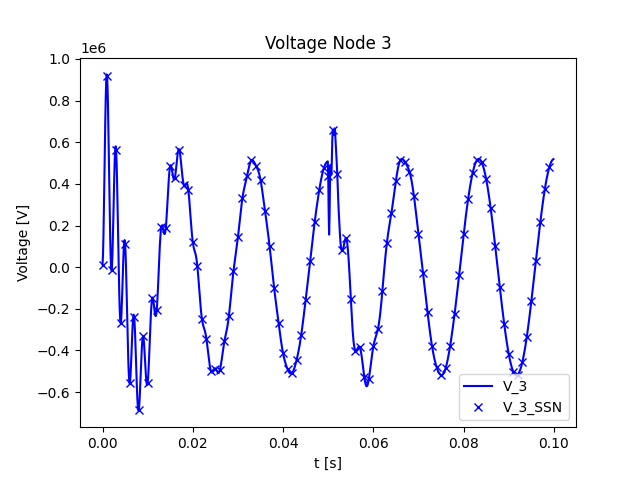

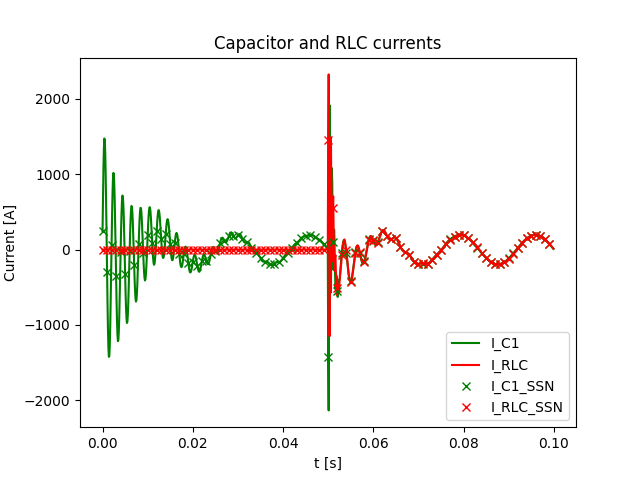

In [49]:
#Plot Results
fig1 = plt.figure()
plt.plot(ts_rc['v3'].time, ts_rc['v3'].values, "b-", label='V_3')
plt.plot(ts_ssn['v3'].time, ts_ssn['v3'].values, "bx", markevery=10, label='V_3_SSN')
plt.title('Voltage Node 3')
plt.xlabel('t [s]')
plt.ylabel('Voltage [V]')
plt.legend(loc = 4)

fig2 = plt.figure()
plt.plot(ts_rc['i_c1'].time, ts_rc['i_c1'].values, "g-", label='I_C1')
plt.plot(ts_rc['i_rlc'].time, ts_rc['i_rlc'].values, "r-", label='I_RLC')
plt.plot(ts_ssn['i_c1'].time, ts_ssn['i_c1'].values, "gx", markevery=10, label='I_C1_SSN')
plt.plot(ts_ssn['i_rlc'].time, ts_ssn['i_rlc'].values, "rx", markevery=10, label='I_RLC_SSN')
plt.title('Capacitor and RLC currents')
plt.xlabel('t [s]')
plt.ylabel('Current [A]')
plt.legend(loc = 4)